# Построение различных моделей машинного обучения для прогнозирования ухода клиентов из банка, повышение качества моделей

## 1 Подготовка данных

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.utils import shuffle

pd.set_option('display.max_columns', None)

In [57]:
df = pd.read_csv('/datasets/Churn.csv')
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


<font size="4"><b>Описание данных в таблице</b></font>

<b>Признаки:</b>

•	RowNumber — индекс строки в данных,

•	CustomerId — уникальный идентификатор клиента,

•	Surname — фамилия,

•	CreditScore — кредитный рейтинг,

•	Geography — страна проживания,

•	Gender — пол,

•	Age — возраст,

•	Tenure — сколько лет человек является клиентом банка,

•	Balance — баланс на счёте,

•	NumOfProducts — количество продуктов банка, используемых клиентом,

•	HasCrCard — наличие кредитной карты,

•	IsActiveMember — активность клиента,

•	EstimatedSalary — предполагаемая зарплата.

<b>Целевой признак:</b>

•	Exited — факт ухода клиента

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


<b>В столбце 'Tenure' имеются пропуски, возможно это те кто является клиентом меньше года, заменим их на 0:</b>

In [59]:
df['Tenure'] = df['Tenure'].fillna(0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


<b>Вывод</b>

После изучения и подготовки данных можно сказать:

- таблица включает 14 столбцов и 10 000 строк (объектов) данных;

- пропусков в столбце 'Tenure' заменены на 0;

- данные приведены к нужным типам;

- таблица будет включать 2 набора данных: признаки - столбцы 'RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', а также целевой признак столбец 'Exited' - факт ухода клиента — 1 или клиент остается — 0;

- перед нами будет стоять задача классификации, т.к. целевой признак уже разбит на 2 категории - уход клиента — 1 и не уход клиента — 0.

## 2 Исследование задачи

### 2.1 Подготовим данные для проведения исследования

In [60]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
display(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


#### Проведем порядковое кодирование столбцов с категориальными признаками

In [61]:
# Проведем прямое кодирование столбцов 'Geography', 'Gender' с категориальными признаками
encoder = OrdinalEncoder()

df[['Geography', 'Gender']] = encoder.fit_transform(df[['Geography', 'Gender']])
display(df)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0.0,0.0,42,2.0,0.00,1,1,1,101348.88,1
1,608,2.0,0.0,41,1.0,83807.86,1,0,1,112542.58,0
2,502,0.0,0.0,42,8.0,159660.80,3,1,0,113931.57,1
3,699,0.0,0.0,39,1.0,0.00,2,0,0,93826.63,0
4,850,2.0,0.0,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5.0,0.00,2,1,0,96270.64,0
9996,516,0.0,1.0,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,0.0,0.0,36,7.0,0.00,1,0,1,42085.58,1
9998,772,1.0,1.0,42,3.0,75075.31,2,1,0,92888.52,1


In [62]:
print(df.dtypes)
display(df['Geography'].value_counts())
display(df['Gender'].value_counts())

CreditScore          int64
Geography          float64
Gender             float64
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


0.0    5014
1.0    2509
2.0    2477
Name: Geography, dtype: int64

1.0    5457
0.0    4543
Name: Gender, dtype: int64

    Прямое кодирование проведено, тип данных столбцов поменялся на float.

### 2.2 Разобъем данные на 3 выборки: обучающую, валидационную и тестовую и исследуем баланс классов

In [64]:
# Поделим всю таблицу на 2 группы: признаки df_features и целевые признаки df_target
df_features = df.drop(['Exited'], axis=1)
df_target = df['Exited']

# Баланс классов 'df_target'
frequency_df = df_target.value_counts(normalize=2/len(df_target))
print(frequency_df)

0    0.7963
1    0.2037
Name: Exited, dtype: float64


<b>Вывод</b>

В классах целевого признака общей таблицы имеется дисбаланс: примерно 80 % отрицательных классов и 20 % положительных классов. 

In [65]:
# Разделим данные на 2 выборки: обучающую и дополнительную (для валидации и теста)
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    df_features, df_target, test_size=0.4, random_state=12345)

display(target_train.shape)
display(target_valid_test.shape)

(6000,)

(4000,)

In [66]:
# Баланс классов в обучающей выборке
frequency_train = target_train.value_counts(normalize=2/len(target_train))
print(frequency_train)

0    0.800667
1    0.199333
Name: Exited, dtype: float64


<b>Вывод</b>

В классах целевого признака обучающей выборки имеется дисбаланс: примерно 80 % отрицательных классов и 20 % положительных классов. 

In [67]:
# Получим еще 2 выборки: валидационную и тестовую
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345)

display(target_valid.shape)
display(target_test.shape)

(2000,)

(2000,)

In [68]:
# Баланс классов в валидационной и тестовой выборках
frequency_valid = target_valid.value_counts(normalize=2/len(target_valid))
print('Валидационная выборка:')
print(frequency_valid, '\n')

frequency_test = target_test.value_counts(normalize=2/len(target_test))
print('Тестовая выборка:')
print(frequency_test)

Валидационная выборка:
0    0.791
1    0.209
Name: Exited, dtype: float64 

Тестовая выборка:
0    0.7885
1    0.2115
Name: Exited, dtype: float64


<b>Вывод</b>

В классах целевого признака валидационной выборки имеется также дисбаланс: примерно 80 % отрицательных классов и 20 % положительных классов.

В классах целевого признака тестовой выборки имеется дисбаланс: примерно 79 % отрицательных классов и 21 % положительных классов.

#### Проведем масштабирование (стандартизацию) признаков 3-х выборок

In [69]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(df[numeric])
features_train[numeric] = scaler.transform(features_train[numeric]) # стандартизация в обучающей выборке
features_valid[numeric] = scaler.transform(features_valid[numeric]) # стандартизация в валидационной выборке
features_test[numeric] = scaler.transform(features_test[numeric]) # стандартизация в тестовой выборке


/tmp/ipykernel_31/2506204717.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric]) # отмасштабировали нужные столбцы в обучающей выборке
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_31/2506204717.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

### 2.3 Проведем обучение моделей без учета дисбаланса классов и найдем для каждой модели значение метрик F1 и AUC-ROC

#### 2.3.1 Обучим модель и проанализируем модель Решающее дерево

    Обучим модель и найдем F1 без подбора гиперпараметров

In [70]:
model_dt = DecisionTreeClassifier(random_state=12345)
model_dt.fit(features_train, target_train)

predictions_train = model_dt.predict(features_train) # предсказание на обучающей выборке
predictions_valid = model_dt.predict(features_valid) # предсказание на валидационной выборке

print('F1:', f1_score(target_valid, predictions_valid)) # F1 для тестовой выборки по формуле

F1: 0.47016706443914086


    Проверим качество Решающего дерева с подбором гиперпараметра - максимальной глубины

In [71]:
# Наилучшая глубина для максимального значений F1 и AUC-ROC (max_depth от 1 до 20 )
f1_list = []
auc_roc_list = []
depth_list = []

best_model_dt = None
best_f1_dt = 0

for depth in range(1, 21):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid = model_dt.predict(features_valid)
    f1_valid = f1_score(target_valid, predictions_valid)
        
    probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]
    auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)
    
    f1_list.append(f1_valid)
    depth_list.append(depth)
    auc_roc_list.append(auc_roc_valid )
    
    if f1_valid > best_f1_dt:
        best_model_dt = model_dt # наилучшая модель
        best_f1_dt = f1_valid  # наилучшее значение F1 на валидационных данных
    
    # из списков получаем таблицу для построения графика
    list_tuples = list(zip(depth_list, f1_list, auc_roc_list))
    tree_f1_auc_depth = pd.DataFrame(list_tuples, columns=['max_depth', 'f1', 'auc_roc'])
    
print('\n')
print("F1 наилучшей модели Решающее дерево на валидационной выборке:", best_f1_dt)
display(tree_f1_auc_depth)



F1 наилучшей модели Решающее дерево на валидационной выборке: 0.5528700906344411


,max_depth,f1,auc_roc
0,1,0.000000,0.692557
1,2,0.521739,0.750181
2,3,0.423488,0.797344
3,4,0.552870,0.820301
4,5,0.516963,0.824354
5,6,0.536050,0.817236
6,7,0.510638,0.801329
7,8,0.527439,0.789138
8,9,0.527407,0.758233
9,10,0.513475,0.755793


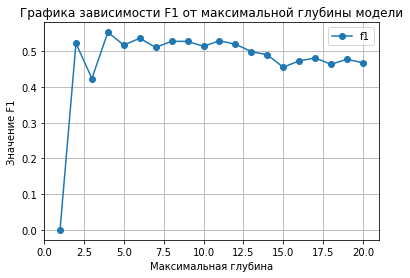

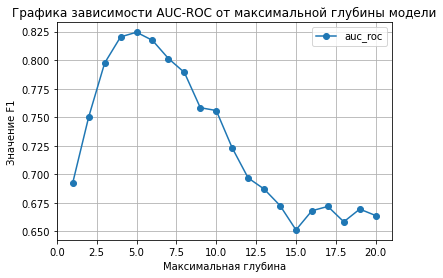

In [72]:
# График зависимости значения F1 модели от гиперпараметра (max_depth)
tree_f1_auc_depth.plot(x='max_depth', y='f1', style='o-', xlim=(0, 21), grid=True)
plt.title('Графика зависимости F1 от максимальной глубины модели')
plt.xlabel('Максимальная глубина')
plt.ylabel('Значение F1')
plt.show()

tree_f1_auc_depth.plot(x='max_depth', y='auc_roc', style='o-', xlim=(0, 21), grid=True)
plt.title('Графика зависимости AUC-ROC от максимальной глубины модели')
plt.xlabel('Максимальная глубина')
plt.ylabel('Значение F1')
plt.show()

<b>Вывод</b>

При подборе гиперпараметра (максимальная глубина модели) получен результат: наибольшее значение метрики F1 - 0.5543, получено при максимальной глубине модели - '4'. При такой глубине значение AUC-ROC составляет 0.8204.

Общий характер поведения метрик F1 и AUC-ROC схож: до глубины 4-5 значения обоих метрик резко растут, пик на глубине 4-5, затем снижение значений метрик.

<b>Построим ROC-кривую и найдем AUC-ROC</b>

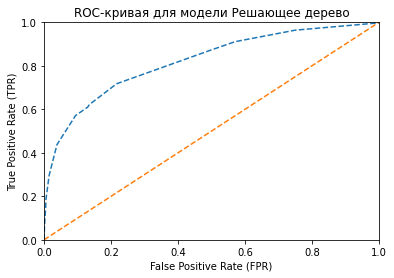

AUC-ROC: 0.8203012055480615


In [73]:
model_dt = DecisionTreeClassifier(random_state=12345, max_depth=4)
model_dt.fit(features_train, target_train)
probabilities_one_valid = model_dt.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая по данным
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Решающее дерево')
plt.show()

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

<b>Вывод</b>

В проведеных исследований посчитаны F1 и AUC-ROC для модели Решающее дерево без дисбаланса классов: 0.5543 и 0.8203 соответственно, что говорит о качестве модели существенно выше качества случайной модели.

#### 2.3.2 Обучим модель и проанализируем модель Случайный лес

    Обучим модель и найдем F1 без подбора гиперпараметров

In [74]:
model_rf = RandomForestClassifier(random_state=12345)
model_rf.fit(features_train, target_train)

predictions_valid = model_rf.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid)) # F1 для тестовой выборки по формуле

F1: 0.5654135338345865


    Проверим качество Случайного леса с перебором гиперпараметра - максимальной глубины и количества деревьев

In [75]:
# оптимальные глубина и количество деревьев для значений F1 и AUC-ROC (max_depth от 1 до 20, estimators от 1 до 100)
f1_rf_list = []
auc_roc_rf_list = []
estimators_rf_list = []
depth_rf_list = []

best_model_rf = None
best_f1_rf = 0

for est in range(1, 51):
    for depth in range(1, 21):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model_rf.fit(features_train, target_train)
        predictions_valid_rf = model_rf.predict(features_valid) # предсказание на валидационной выборке
        f1_valid_rf = f1_score(target_valid, predictions_valid_rf) # f1 для валидационной выборки
        
        probabilities_one_valid_rf = model_rf.predict_proba(features_valid)[:, 1]
        auc_roc_valid_rf = roc_auc_score(target_valid, probabilities_one_valid_rf)
        
        f1_rf_list.append(f1_valid_rf)
        auc_roc_rf_list.append(auc_roc_valid_rf)
        estimators_rf_list.append(est)
        depth_rf_list.append(depth)

        if f1_valid_rf > best_f1_rf:
            best_model_rf = model_rf # наилучшая модель
            best_f1_rf = f1_valid_rf # наилучшее значение F1 на валидационных данных

        # из списков получаем таблицу для построения графика
        list_tuples = list(zip(depth_rf_list, estimators_rf_list, f1_rf_list, auc_roc_rf_list))
        forest_f1_auc_est_depth = pd.DataFrame(list_tuples, columns=['max_depth', 'estimators','f1', 'auc_roc'])
        
print('\n')
print("F1 наилучшей модели Случайный лес на валидационной выборке:", best_f1_rf)
display(forest_f1_auc_est_depth)



F1 наилучшей модели Случайный лес на валидационной выборке: 0.5922619047619048


,max_depth,estimators,f1,auc_roc
0,1,1,0.000000,0.692557
1,2,1,0.468391,0.714034
2,3,1,0.129754,0.721147
3,4,1,0.199575,0.738785
4,5,1,0.524096,0.776480
...,...,...,...,...
995,16,50,0.563253,0.832735
996,17,50,0.567568,0.829933
997,18,50,0.555891,0.833160
998,19,50,0.570571,0.835364


In [86]:
# Наилучшие гиперпараметры для максимального значения F1
display(forest_f1_auc_est_depth.query('f1 == 0.5922619047619048'))

,max_depth,estimators,f1,auc_roc
653,14,33,0.592262,0.833444


<b>Построим ROC-кривую и найдем AUC-ROC</b>

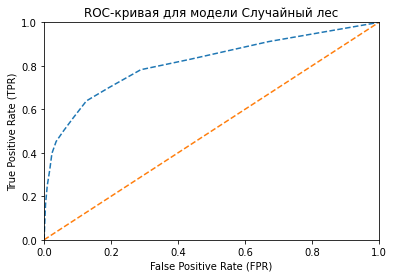

AUC-ROC: 0.8140020203364404


In [87]:
model_rf = RandomForestClassifier(random_state=12345, n_estimators=14, max_depth=33) 
model_rf.fit(features_train, target_train)
probabilities_one_valid = model_rf.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая по даным
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Случайный лес')
plt.show()

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

<b>Новый вывод</b>

В проведеных исследований посчитаны F1 и AUC-ROC для модели Случайный лес: 0.5922 и 0.8140 соответственно, что говорит о достаточно неплохом качестве модели. Проведен перебор гиперпараметров: глубина от 1 до 30, количество деревьев от 1 до 150.  Оптимальное значение F1 получено при глубина - 14, количество деревьев - 33.

#### 2.3.3. Обучим модель и проанализируем модель Логистическая регрессия

    Обучим модель и найдем F1

In [88]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear')
model_lr.fit(features_train, target_train)

predictions_train = model_lr.predict(features_train) # предсказание на обучающей выборке
predictions_valid = model_lr.predict(features_valid) # предсказание на валидационной выборке

print('F1:', f1_score(target_valid, predictions_valid)) # F1 для тестовой выборки по формуле

F1: 0.27889908256880735


    Построим ROC-кривую и найдем AUC-ROC

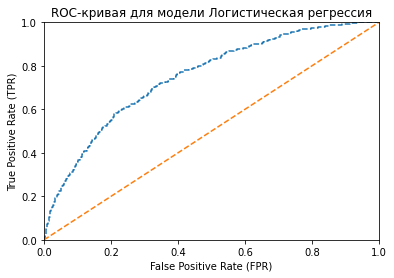

AUC-ROC: 0.7499833654933794


In [89]:
probabilities_one_valid = model_lr.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая по данным
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Логистическая регрессия')
plt.show()

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid))

<b>Вывод</b>

В проведеных исследований посчитаны F1 и AUC-ROC для модели Логистическая регрессия: 0.2788 и 0.7499 соответственно, что говорит о не неплохом качестве модели.

Для модели Логистическая регрессия после удаления лишних столбцов и масштабирования по раздельности выборок обе метрики существенно возросли.

<b>Вывод по пункту 2</b>

В результате построения и исследования 3-х моделей без учета дисбаланса классов можно сделать вывод: наилучшим образом показала себя модель Случайный лес, хуже всего показала себя модель Логистическая регрессия.

## 3 Борьба с дисбалансом

Для улучшения качества модели учтем дисбаланс классов в выборках

### 3.1 Сбалансируем классы с помощью операции 'upsampling'

    Проверим соотношение (баланс) классов в обучающей выборке до балансировки

In [90]:
# Баланс классов в обучающей выборке
frequency_train = target_train.value_counts(normalize=2/len(target_train))
print('Относительное соотношение классов в обучающей выборке:')
print(frequency_train, '\n')

balance_train = target_train.value_counts()
print('Абсолютное соотношение классов в обучающей выборке:')
print(balance_train)

Относительное соотношение классов в обучающей выборке:
0    0.800667
1    0.199333
Name: Exited, dtype: float64 

Абсолютное соотношение классов в обучающей выборке:
0    4804
1    1196
Name: Exited, dtype: int64


<b>Сбалансируем классы в обучающей выборке</b>

In [91]:
# Функция:
# 1. Делит выборку на отрицательные и положительные объекты
# 2. Копирует несколько раз положительные объекты
# 3. С учётом полученных данных создает новую обучающую выборку
# 4. Перемешивает данные в выборке
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled 

# Функция 'upsample' на обучающей выборке
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print('Обучающая выборка до балансировки:')
print(features_train.shape)
print(target_train.shape, '\n')
print('Обучающая выборка после балансировки:')
print(features_upsampled.shape)
print(target_upsampled.shape)


Обучающая выборка до балансировки:
(6000, 10)
(6000,) 

Обучающая выборка после балансировки:
(9588, 10)
(9588,)


    Проверим соотношение (баланс) классов в обучающей выборке после балансировки

In [92]:
# Баланс классов в обучающей выборке
frequency_train_upsampled = target_upsampled.value_counts(normalize=2/len(target_upsampled))
print('Относительное соотношение классов в обучающей выборке:')
print(frequency_train_upsampled, '\n')

balance_train_upsampled = target_upsampled.value_counts()
print('Абсолютное соотношение классов в обучающей выборке:')
print(balance_train_upsampled)

Относительное соотношение классов в обучающей выборке:
0    0.501043
1    0.498957
Name: Exited, dtype: float64 

Абсолютное соотношение классов в обучающей выборке:
0    4804
1    4784
Name: Exited, dtype: int64


<b>Вывод</b>

Балансировка классов в обучающей выборке проведена, в результате соотношение положительных и отрицательных классов практически равны друг другу.

### 3.2 Проведем обучение моделей с учетом баланса классов и найдем для каждой модели значение метрик F1 и AUC-ROC

#### 3.2.1 Обучим модель - Решающее дерево

    Обучим модель и найдем F1

In [93]:
model_dt_b = DecisionTreeClassifier(random_state=12345, max_depth=4) # модель с глубиной 4
model_dt_b.fit(features_upsampled, target_upsampled)

predictions_valid_b = model_dt_b.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid_b)) # F1 для тестовой выборки

F1: 0.5277777777777778


    Построим ROC-кривую и найдем AUC-ROC

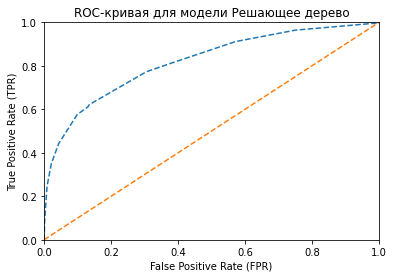

AUC-ROC: 0.8190853743368881


In [94]:
model_dt_b = DecisionTreeClassifier(random_state=12345, max_depth=4) # модель с глубиной 4
model_dt_b.fit(features_upsampled, target_upsampled)

probabilities_one_valid_b = model_dt_b.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_b)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая на данных
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Решающее дерево')
plt.show()

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_b))

<b>Вывод</b>

В проведеных исследований посчитаны F1 и AUC-ROC для модели Решающее дерево после балансировки обучающей выборки: 0.5277 и 0.8190 соответственно. На удивление обе значение обеих метрик снизилось.

#### 3.2.2 Обучим модель - Случайный лес

    Обучим модель и найдем F1 на найденных в п. 2.3.2 гиперпараметрах

In [95]:
model_rf_b = RandomForestClassifier(random_state=12345, n_estimators=33, max_depth=14)
model_rf_b.fit(features_upsampled, target_upsampled)

predictions_valid_b = model_rf_b.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid_b)) # F1 для тестовой выборки по формуле

F1: 0.6127450980392157


<b>Вывод</b>

В проведеных исследований посчитаны F1 для модели Случайный лес после балансировки на выбранных ранее гиперпараметрах. F1 показало значение 0.6127, что уже удовлетворяет условиям выполнения.

Дальнейшее изменение гиперпараметров в модели Случайный лес не требуется, т.к значение метрики F1 достаточно для выполнения условия (F1 не менее 0.59).

<b>Проверим качество Случайного леса при выбранных гиперпараметрах - максимальной глубины и количества деревьев</b>

    Построим ROC-кривую и найдем AUC-ROC

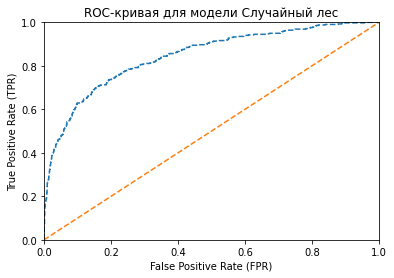

AUC-ROC: 0.8460294944924662


In [97]:
model_rf_b = RandomForestClassifier(random_state=12345, n_estimators=33, max_depth=14)
model_rf_b.fit(features_upsampled, target_upsampled)

probabilities_one_valid_b = model_rf_b.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_b)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая на данных
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Случайный лес')
plt.show()

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_b))

<b>Вывод</b>

В проведеных исследованиях посчитаны F1 и AUC-ROC для модели Случайный лес после балансировки обучающей выборки и с подбором новых гиперпараметров: 0.6127 и 0.8460 соответственно, что говорит о хорошем качестве модели.   Оптимальное значение F1 получено при глубина - 14, количество деревьев - 33. Дополнительный подбор гиперпараметров не потребовался, т.к. нужный результат (F1 не меньше 0.59) получен уже на них.

#### 3.2.3 Обучим модель - Логистическая регрессия

    Обучим модель и найдем F1

In [98]:
model_lr_b = LogisticRegression(random_state=12345, solver='liblinear')
model_lr_b.fit(features_upsampled, target_upsampled)

predictions_valid_b = model_lr.predict(features_valid)

print('F1:', f1_score(target_valid, predictions_valid_b)) # F1 для тестовой выборки по формуле

F1: 0.27889908256880735


    Построим ROC-кривую и найдем AUC-ROC

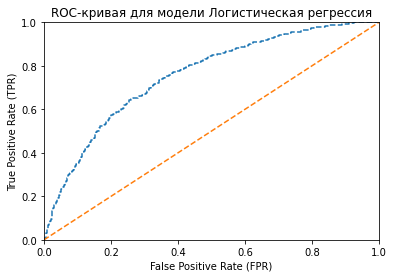

AUC-ROC: 0.7561441818544752


In [99]:
probabilities_one_valid_b = model_lr_b.predict_proba(features_valid)[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid_b)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая на данных
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Логистическая регрессия')
plt.show()

print('AUC-ROC:', roc_auc_score(target_valid, probabilities_one_valid_b))

<b>Вывод</b>

В проведеных исследований посчитаны F1 и AUC-ROC для модели Логистическая регрессия: 0.2788 и 0.7561 соответственно, что говорит о качестве модели лучшем, чем у случайной модели.

<b>Вывод по пункту 3</b>

Наилучшей моделью, на которой удалось достигнуть наивысших значений метрик F1 (0.6127) и AUC-ROC (0.8460), оказалась модель Случайный лес при обучении на сбалансированной выборке и с подобранными гиперпараметрами.

По этой причине для тестирования модели на тестовой выборке будет использована данная модель.

Наихудший результат показала модель Логистическая регрессия, но качество которой оказалось лучше случайной модели.

## 4 Тестирование модели

<b> В соответствии с результатами пункта 3 для тестирования модели на тестовой выборке будет использована модель Случайный лес, обученная на сбалансированной обучающей выборке и с подобранными гиперпараметрами.</b>

    Обучим модель и найдем F1 на найденных в п. 2.3.2 гиперпараметрах

<b>Перед тестированием объединим две выборки обучающую и валидационную</b>

In [100]:
features_consolid = pd.concat([features_upsampled] + [features_valid])
target_consolid = pd.concat([target_upsampled] + [target_valid])

In [101]:
model_rf_test = RandomForestClassifier(random_state=12345, n_estimators=33, max_depth=14)
model_rf_test.fit(features_consolid, target_consolid)

predictions_valid_test = model_rf_test.predict(features_test)

print('F1:', f1_score(target_test, predictions_valid_test)) # F1 для тестовой выборки по формуле

F1: 0.6071428571428572


<b>Вывод</b>

В проведеных исследованиях на тестовой выборке посчитано значение F1 для модели Случайный лес после балансировки обучающей выборки: 0.6071. Оптимальное значение F1 получено при глубина - 14, количество деревьев - 33.

<b>Проверим качество Случайного леса при выбранных гиперпараметрах - максимальной глубины и количества деревьев</b>

    Построим ROC-кривую и найдем AUC-ROC

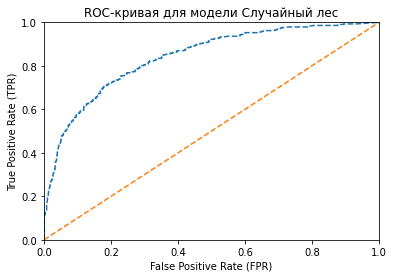

AUC-ROC: 0.8405904319030507


In [102]:
model_rf_test = RandomForestClassifier(random_state=12345, n_estimators=33, max_depth=14)
model_rf_test.fit(features_upsampled, target_upsampled)

probabilities_one_valid_test = model_rf_test.predict_proba(features_test)[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_valid_test)

plt.figure()
plt.plot(fpr, tpr, linestyle='--') # ROC-кривая
plt.plot([0, 1], [0, 1], linestyle='--') # ROC-кривая случайной модели

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая для модели Случайный лес')
plt.show()

print('AUC-ROC:', roc_auc_score(target_test, probabilities_one_valid_test))

<b>Вывод</b>

В проведеных исследованиях на тестовой выборке посчитаны F1 и AUC-ROC для модели Случайный лес после балансировки обучающей выборки и с новым подбором гиперпараметров: 0.6071 и 0.8405 соответственно. Оптимальное значение F1 получено при глубина - 12, количество деревьев - 33.

<font size="4"><b>Общий вывод</b></font>

В ходе проведенной работы:

1. Проведена изучены и подготовлены для исследования представленные данные;

2. В рамках подготовки данных для обучения моделей проведены порядковое кодирование столбцов с категориальными признаками и масштабирование (стандартизация) признаков;

3. Данные разбиты на 3 выборки: обучающую, валидационную и тестовую в соотношении 60%, 20% и 20% соответственно.

4. Проведено обучение моделей Решающее дерево, Случайный лес и Логистическая регрессия на обучающей выборке без учета дисбаланса с подбором гиперпараметров. Посчитаны значения метрик F1 и AUC-ROC, а также отображены на графике кривые ошибок (ROC-крива) для каждой модели. В результате наилучший результат показала модель Случайный лес: F1 и AUC-ROC - 0.5922 и 0.8140 соответственно. <b>При обучении модели Случайный лес с новым подбором гиперпараметров достигнут нужный результат F1 = 0,59.</b>

5. Проведена балансировка положительных и отрицательных классов обучающей выборки. Реультат после балансироки: относительное соотношение классов - нулей - 0.501043, единиц - 0.498957; абсолютное соотношение классов - нулей - 4804, единиц - 4784. Т.е. практически поровну.

6. Проведено обучение моделей Решающее дерево, Случайный лес и Логистическая регрессия на обучающей выборке после балансировки с новым подбором гиперпараметров. Посчитаны значения метрик F1 и AUC-ROC, а также отображены на графике кривые ошибок (ROC-крива) для каждой модели. В результате наилучший результат вновь показала модель Случайный лес: F1 и AUC-ROC - 0.6127 и 0.8460 соответственно. <b>При обучении модели Случайный лес с новым подбором гиперпараметров достигнут нужный результат F1 = 0,59.</b>

7. Выбрана модель Случайный лес для проведения тестирования, как модель показавшая наилучшее качество в предыдущих исследованиях. <b>В результате чего поучено значение метрики F1 = 0.6071, что также позволило достигнуть результата, поставленного в условии (F1 = 0,59). Вместе с тем, значение метрики AUC-ROC = 0.8405 оказалось наивысшим во всем проведенном исследовании и наиболее близком к 1, что говорит о неплохом качестве модели.</b> Данная модель, обученная на сбалансированной обучающей выборке и с новым подбором гиперпараметров наилучшим образом подойдет для прогнозирования ухода клиентов из банка.